<a href="https://colab.research.google.com/github/ZeeMurphy/Projects-Z/blob/main/Zivar_S_Murphy_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zivar S Murphy    
Data 201    
Progessor: Abdirisak Mohamed    
16 May 2025

###**Stroke Prediction with Decision Trees: A Machine Learning Approach**

Stroke is a life-threatening medical condition that often leads to long-term disabilities such as paralysis, speech loss, or confusion. While some types, like transient ischemic attacks (TIAs), have better outcomes, others involving artery blockages or ruptures are far more dangerous. Each year, strokes affect 15 million people worldwide, causing 5 million deaths and leaving another 5 million permanently disabled. High blood pressure and smoking are among the leading risk factors, making prevention and early intervention essential (World Health Organization).A dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) is used for stroke prediction through Decision Tree evaluation.The dataset has 12 columns and 5110 observations. The features are: gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, and stroke.

###**Preparing and wrangling the data**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



In [ ]:
#Prepare and wrangle your data with Pandas and Numpy
df1 = pd.read_csv("https://raw.githubusercontent.com/ZeeMurphy/Projects-Z/refs/heads/main/Stroke.csv")
df1.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df1.shape

(5110, 12)

In [ ]:
df1.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df= df1.dropna()

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


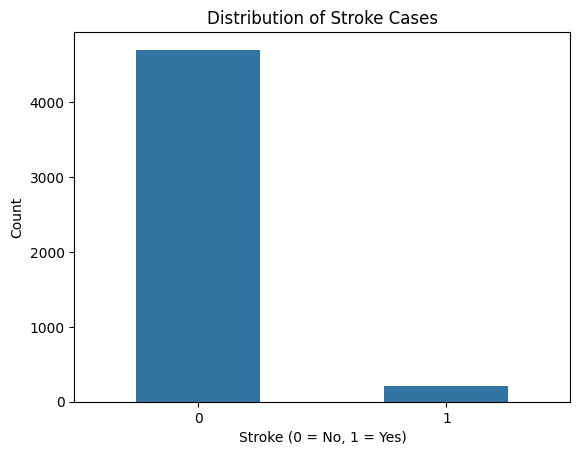

In [ ]:
sns.countplot(x='stroke', data=df, width=0.5)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

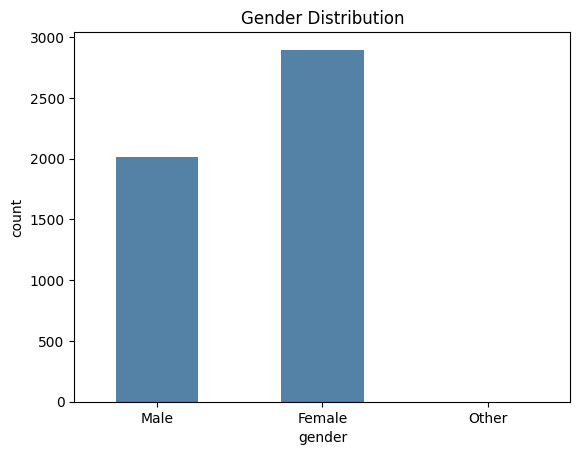

In [ ]:
sns.countplot(x='gender', data=df, width=0.5, color='#4682B4')
plt.title('Gender Distribution')
plt.show()


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2897
Male,2011
Other,1


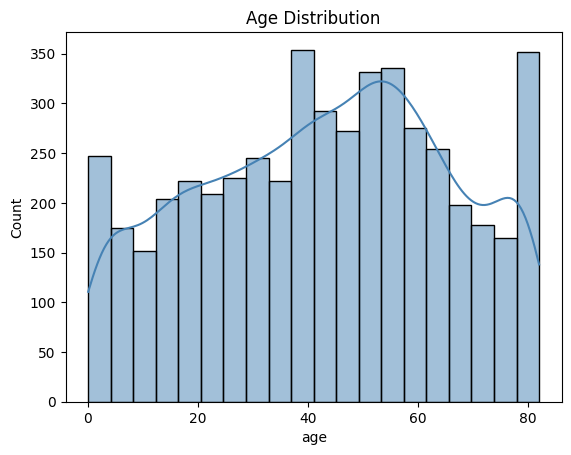

In [ ]:
sns.histplot(df['age'], bins=20, kde=True, color='#4682B4')
plt.title('Age Distribution')
plt.show()

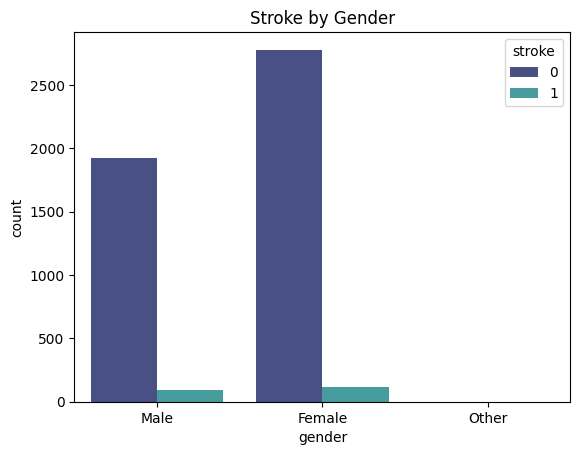

In [ ]:
sns.countplot(x='gender', hue='stroke', data=df, palette = 'mako')
plt.title('Stroke by Gender')
plt.show()


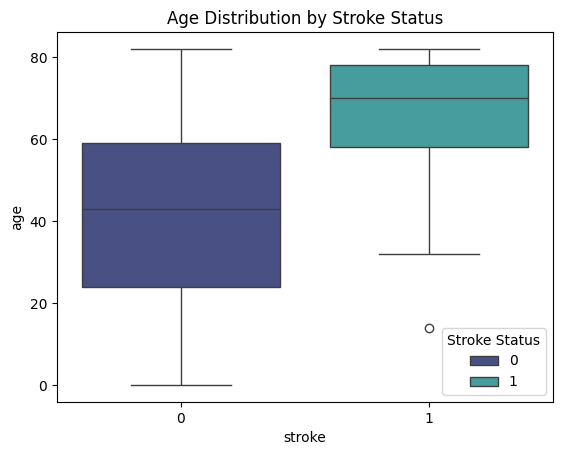

In [ ]:
sns.boxplot(x='stroke', y='age', data=df, hue='stroke', palette='mako')
plt.title('Age Distribution by Stroke Status')
plt.legend(title='Stroke Status', loc='lower right')  # Optional, to show legend
plt.show()


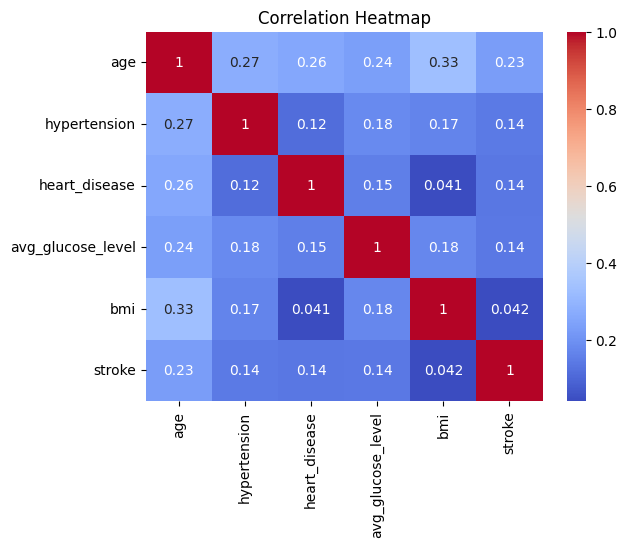

In [ ]:
numerical_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Print unique values for columns with 4 or fewer unique values
for col in df1.columns:
    if df1[col].nunique() <= 5:
        print(f"{col} ({df1[col].nunique()} unique values): {df1[col].unique()}")


gender (3 unique values): ['Male' 'Female' 'Other']
hypertension (2 unique values): [0 1]
heart_disease (2 unique values): [1 0]
ever_married (2 unique values): ['Yes' 'No']
work_type (5 unique values): ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type (2 unique values): ['Urban' 'Rural']
smoking_status (4 unique values): ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke (2 unique values): [1 0]


###**Scikit-learn DecisionTree Classification test and prediction of stroke using appropriate metric and interpreting the meaning of the score.**

We drop the id column (not useful for modeling) and encode the categorical variables using pd.get_dummies.

In [ ]:
# Convert categorical columns to numeric
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df_encoded.drop(['id', 'stroke'], axis=1)
y = df_encoded['stroke']


In [ ]:
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,True,False,True,False,True,False,False,True,True,False,False


In [ ]:
y[0:10]

,stroke
0,1
2,1
3,1
4,1
5,1
6,1
7,1
9,1
10,1
11,1


**Train Decision Tree Classifier**

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicting & evaluating
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)




Accuracy: 0.9195519348268839
Recall: 0.1320754716981132
F1-Score: 0.15053763440860216


Interpretation of Results:
Accuracy: 0.92 (92%)

Accuracy measures the overall proportion of correct predictions (both true positives and true negatives) out of all predictions.

An accuracy of 92% seems high, but it can be misleading in cases of class imbalance (e.g., if the majority class is much more frequent than the minority class). In your case, it likely reflects that the model is predicting the majority class (perhaps "no stroke") well but might not be identifying the minority class ("stroke") accurately.

Recall: 0.13 (13%)

Recall (also known as sensitivity or true positive rate) measures the proportion of actual positive instances (stroke cases) that were correctly identified by the model.

A recall of 13% is very low. This means that the model is missing 85% of the actual stroke cases, which is a significant problem, especially if you care about identifying stroke cases (i.e., avoiding false negatives). In practical terms, this means the model is failing to detect most of the stroke cases.

F1-Score: 0.15 (15%)

F1-Score is the harmonic mean of precision and recall. It combines both precision and recall into a single score that balances them.

An F1-score of 0.15 is very low, indicating a poor balance between precision and recall. This reinforces that the model's ability to detect and correctly classify stroke cases is weak, despite high accuracy.

Key Takeaways:
Accuracy is not the best metric to rely on in imbalanced datasets: In this case, the high accuracy of 92% is primarily due to the fact that the model might be predicting "no stroke" (majority class) correctly most of the time, but it's failing at predicting "stroke" (minority class). This is a common pitfall when working with imbalanced datasets. Accuracy alone doesn't reflect the model's performance on the minority class (stroke in this case).

Low recall indicates poor identification of stroke cases: A recall of 13% means that the model is missing the majority of stroke cases, which is concerning in a medical context. If you're predicting something like stroke, you want your model to catch as many stroke cases as possible (high recall), even if that means having a few false positives.

Low F1-score indicates poor balance between precision and recall: The F1-score of 0.15 further confirms that the model is performing poorly in terms of both identifying stroke cases (low recall) and minimizing false positives (low precision).

###**Predicting the classes of the test data. Predicting the class**
probability of the test data**

In [ ]:
y_pred_classes = clf.predict(X_test)

y_pred_probabilities = clf.predict_proba(X_test)

print("Predicted Classes:", y_pred_classes)
print("Predicted Probabilities:", y_pred_probabilities)


Predicted Classes: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

Predicted Classes
The model is predicting either 0 or 1 as the class label for each test instance.

For example:
The first prediction is 0, meaning the model predicts the test instance belongs to class 0.The second prediction is 0, meaning the model predicts the test instance belongs to class 0. And so on for the rest of the test data.

Predicted Probabilities
This array shows the probability of each instance belonging to each of the possible classes.

For example:
[1. 0.] means the model predicts a probability of 100% (or 1) for class 0 and 0% for class 1. This is a strong confidence in predicting class 0.

[0. 1.] means the model predicts a probability of 0% for class 0 and 100% (or 1) for class 1. This is a strong confidence in predicting class 1.

Predicted Probabilities (y_pred_probabilities): This shows the confidence level of the model in its predictions. We could use the predicted probabilities to make decisions based on a higher threshold, such as predicting 1 only when the probability of class 1 is above 70%.

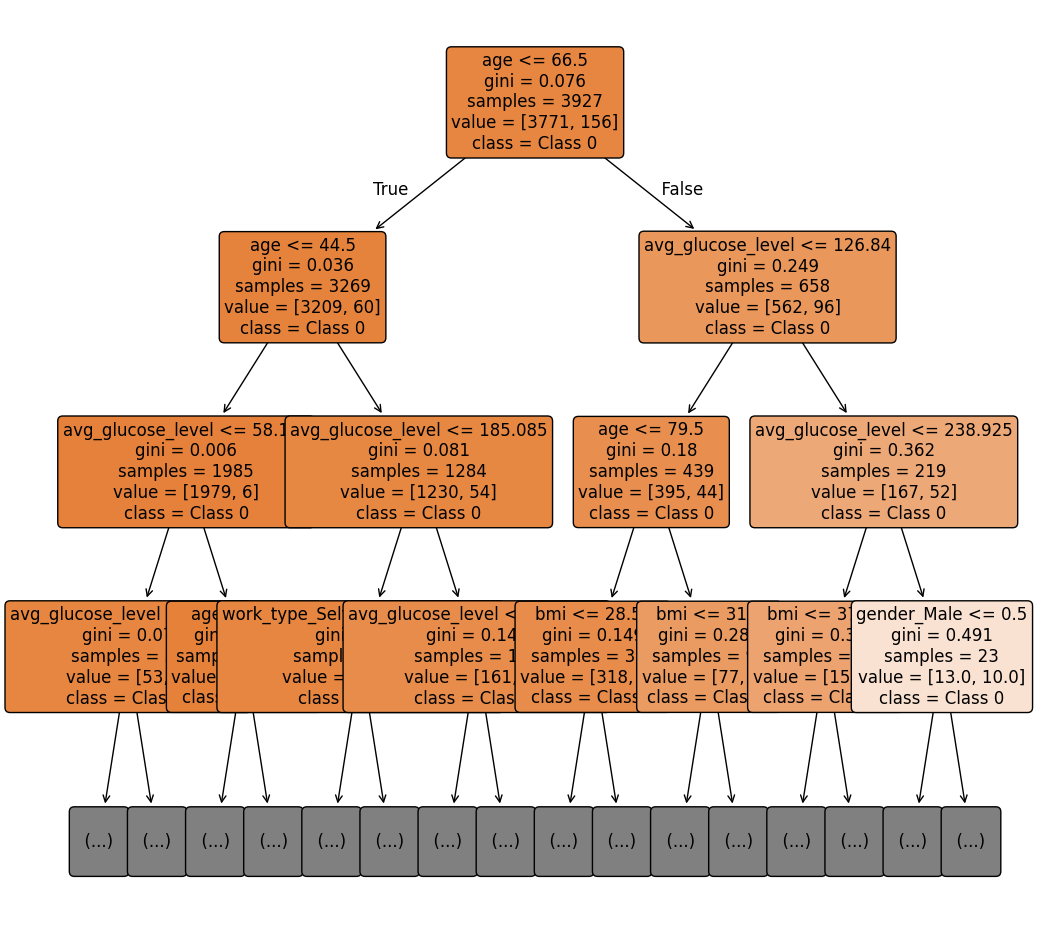

<Figure size 640x480 with 0 Axes>

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))  # Set the figure size
tree.plot_tree(decision_tree=clf, max_depth=3, fontsize=12, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

plt.savefig('/content/decision_tree_plot.png')

At the root of the decision tree, the model splits based on whether the individual's age is less than or equal to 66.5 years.
gini = 0.076: The Gini impurity at this node is 0.076, which is quite low.
Gini impurity measures how "mixed" the classes are at a node.   
samples = 3927: This node contains 3927 total data points.    
value = [3771,156]: This shows the distibution of classes at this node: 3771 instances of class 0, 156 instances of class 1. So about 96% of the samples are class 0.    
class = Class 0: This is the predicted class at this node. Since the majority of the sampples are class 0, the node is classified as class 0.      
The next level splits:    
Left Child Node (True branch): Codition: age<=44.5, gini =0.036 very low impurity, this node is very pure. samples = 3269, which 3,209 of them belong to Class 0, and 60 to class 1. class = Class 0 because the vast majority are class 0.     
Right child node (False branch): with gini of 0.249: higher impurity, the node has more mix between the class.    
For individuals older than 44.5 but younger than or equal to 66.5, the model checks if their average glucose level is ≤ 126.84. This node is less pure (Gini 0.249) and contains a higher proportion of Class 1 (14%) compared to the left node. Still, Class 0 is dominant.

If age ≤ 44.5, very likely Class 0.

If 44.5 < age ≤ 66.5 and avg_glucose_level ≤ 126.84, still likely Class 0, but more chance of Class 1.

This shows how the tree uses age first, then glucose level to start identifying more Class 1 cases.


Age is the dominant predictor.

Very young people are overwhelmingly Class 0.

in older people risk begins to emerge:

Smoking and high glucose are key factors.

High glucose level shows stronger association with Class 1 than smoking alone, according to this tree.

##**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_cl = RandomForestClassifier(n_estimators=100, random_state=11)
rf_cl.fit(X_train, y_train)
rf_pred = rf_cl.predict(X_test)

accuracy = float(np.sum(rf_pred == y_test)) / y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.946029


Accuracy is still high and we know that's because our dataset is imbalanced.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, rf_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       940
           1       0.00      0.00      0.00        42

    accuracy                           0.96       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.96      0.94       982

Confusion Matrix:

[[940   0]
 [ 42   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy = 96%: Looks good but is misleading — our model is just predicting everyone as class 0 (no stroke).

Precision, Recall, F1 for class 1 (stroke) = 0.00: our model didn't identify a single stroke case correctly.

The confusion matrix shows there are 940 True Negatives, o False Positives. 42 False Negatives, 0 True Positives. So the model predicted all 982 sampkes as class 0. Zero prediction for clas 1.


Use class_weight='balanced' in Random Forest
This tells the model to pay more attention to the minority class:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_cl = RandomForestClassifier(
    n_estimators=100,
    random_state=11,
    class_weight='balanced'  # <-- this is key
)

rf_cl.fit(X_train, y_train)
rf_pred = rf_cl.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Confusion Matrix:

[[929   0]
 [ 53   0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**XGBoost**

We try XGBoost due to the imbalanced dataset to recheck the accuracy. XGBoost used gradient boosting which builds trees sequentially and learns from the previous trees' errors. It incldes regularization, which can help overfitting.

In [ ]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=10, n_estimators=20, seed=99)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.945010


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.40      0.04      0.07        53

    accuracy                           0.95       982
   macro avg       0.67      0.52      0.52       982
weighted avg       0.92      0.95      0.92       982

[[926   3]
 [ 51   2]]


This shows there is a slight improvement over Decision Tree and Random Forest. But the performance on stroke detenction is still poor as recall is only 4%.

Now we use k-fold Cross-Validation using XGBoost's built-in method (xgb.cv)—and this is a technique for evaluating model performance more reliably than a single train-test split. This reduces the chance of overfitting to a single train-test split. I use "max_depth": 4 to split the data into 4 parts. It trains on 3 parts, tests on the remaining one. Then, it rotates this 4 times so each part is used as test set once. Finally, it averages the results.

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,num_boost_round=10, metrics="error", as_pandas=True)
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))

Accuracy: 0.957425


**Stratification**

Next, I use Stratification because of the imbalance in my dataset to make sure both classes (0 and 1) are represented proportionally. Stratification makes sure that both the training and test sets have the same proportion of target classes (0,1).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
print("Original class distribution:")
print(y.value_counts())

print("\nTraining set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Original class distribution:
stroke
0    4700
1     209
Name: count, dtype: int64

Training set class distribution:
stroke
0    3760
1     167
Name: count, dtype: int64

Test set class distribution:
stroke
0    940
1     42
Name: count, dtype: int64


Original set: class 0 (stroke) = 4700 samples stroke, class 1 (stroke) = 209 samples, only about 4.3% of data belogns to class 1.    
Training set: class 0 = 3760, class 1 = 167, same ratio as original
Test set: class 0 = 940, class 1: 42, preserved the ratio    
Stratification ensures that the proportion of stroke and non-stroke cases is maintained in both the training and test sets.

In [ ]:
# Train
xg_cl = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, n_estimators=50, seed=42)
xg_cl.fit(X_train, y_train)

# Predict on test set
y_pred = xg_cl.predict(X_test)

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       940
           1       0.00      0.00      0.00        42

    accuracy                           0.95       982
   macro avg       0.48      0.50      0.49       982
weighted avg       0.92      0.95      0.93       982

Confusion Matrix:
[[934   6]
 [ 42   0]]


934 True Negatives: Class 0 correctly predicted as 0 (no stroke)

6 False Positives: Class 0 wrongly predicted as 1

42 False Negatives: Class 1 wrongly predicted as 0

0 True Positives: Class 1 correctly predicted as 1

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Applying SMOTE to the training set only
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Training a model on the balanced data
rf_cl = RandomForestClassifier(random_state=42)
rf_cl.fit(X_train_sm, y_train_sm)

# Predicting on the original test set
y_pred = rf_cl.predict(X_test)

# Evaluating
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.10      0.10      0.10        42

    accuracy                           0.92       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.92      0.92       982

Confusion Matrix:
[[904  36]
 [ 38   4]]


Recall for class 1 (stroke cases) improved from 0 to 0.10, meaning  the model now catches 10% of actual stroke cases instead of none.

Precision for class 1 is also low (0.10), so many predicted stroke cases are false positives.

Confusion matrix shows 4 true positives, 38 false negatives (missed strokes), 36 false positives, and 904 true negatives.


SMOTE helped a bit by making the model detect some stroke cases, but recall is still quite low, so there’s room for improvement.



**Conclusion**

Conclusion: In conclusion, this project explored stroke prediction using machine learning techniques on an imbalanced dataset. Initial models struggled to correctly identify stroke cases due to the overwhelming number of non-stroke instances. Strategies such as stratified sampling, SMOTE (Synthetic Minority Oversampling Technique), and XGBoost were applied to improve model performance. While XGBoost showed slightly better precision, and SMOTE improved recall marginally, predicting stroke cases remained challenging due to class imbalance and limited stroke data. These results highlight the importance of handling imbalanced datasets carefully and suggest that further improvement could be achieved through more advanced resampling techniques, feature engineering, or collecting more representative data.